# Various unused charts and ideas

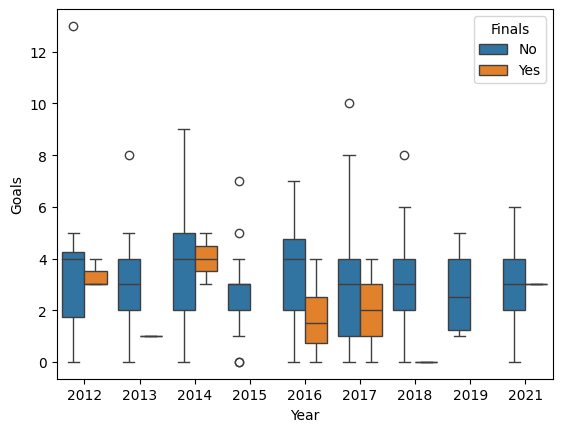

<Figure size 1000x600 with 0 Axes>

In [24]:
# boxplot performances over the years
sns.boxplot(data=Franklin_Lance, x="Year", y="Goals", hue="Finals")
plt.figure(figsize=(10, 6))
plt.show()

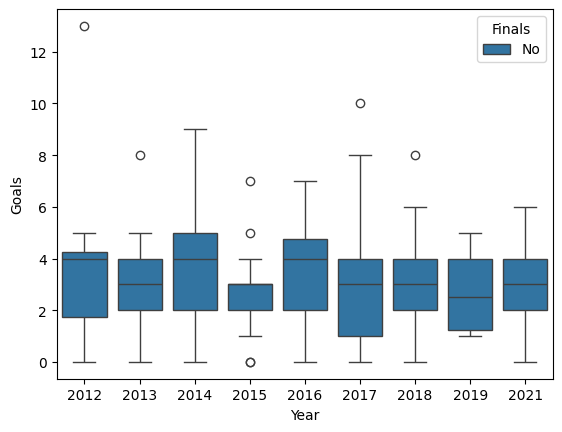

<Figure size 1000x600 with 0 Axes>

In [25]:
# plot
tmp = Franklin_Lance.query("Finals == 'No'")
sns.boxplot(data=tmp, x="Year", y="Goals", hue="Finals")
plt.figure(figsize=(10, 6))
plt.show()

### unused ideas

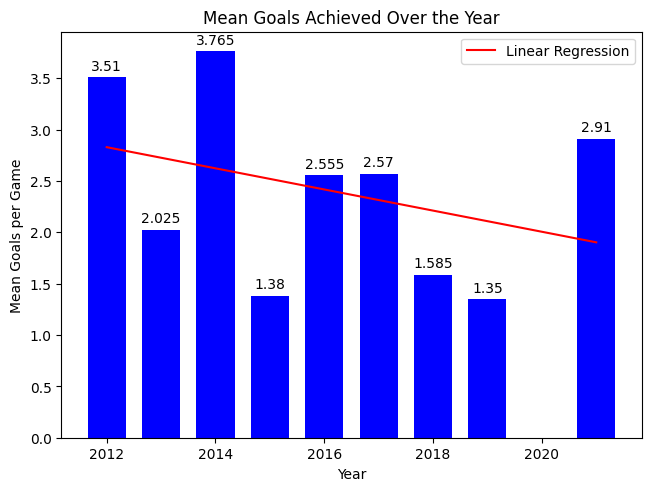

In [26]:
# Calculate the overall mean goals per year
overall_mean_goals = {year: np.mean(goals) for year, goals in calculate_goals_mean(Franklin_Lance).items()}

x = np.array(list(overall_mean_goals.keys())).reshape(-1, 1)  # Reshape for linear regression
y = np.array(list(overall_mean_goals.values()))

# Create linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values using the model
y_pred = model.predict(x)

fig, ax = plt.subplots(layout='constrained')

# Plot the bar chart
ax.bar(x.flatten(), y, color='blue', width=0.7)
ax.bar_label(ax.containers[0], padding=3) 

# Plot the linear regression line
ax.plot(x, y_pred, color='red', label='Linear Regression')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean Goals per Game')
ax.set_title('Mean Goals Achieved Over the Year')

# Add legend
ax.legend()

plt.show()

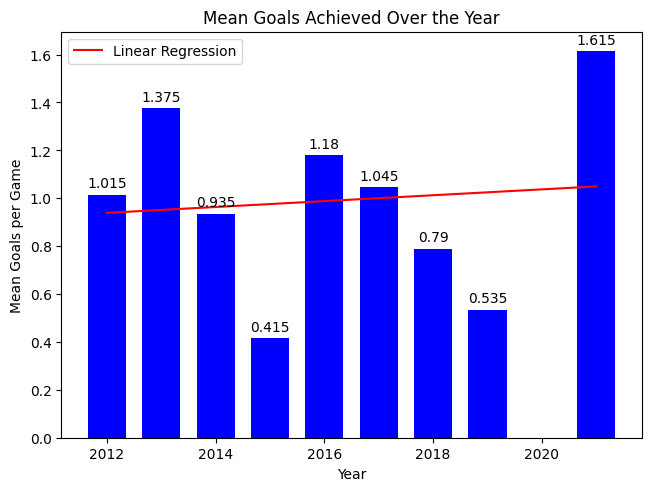

In [27]:
# Calculate the overall mean goals per year
overall_mean_goals = {year: np.mean(goals) for year, goals in calculate_goals_mean(Franklin_comp).items()}

x = np.array(list(overall_mean_goals.keys())).reshape(-1, 1)  # Reshape for linear regression
y = np.array(list(overall_mean_goals.values()))

# Create linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values using the model
y_pred = model.predict(x)

fig, ax = plt.subplots(layout='constrained')

# Plot the bar chart
ax.bar(x.flatten(), y, color='blue', width=0.7)
ax.bar_label(ax.containers[0], padding=3) 

# Plot the linear regression line
ax.plot(x, y_pred, color='red', label='Linear Regression')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean Goals per Game')
ax.set_title('Mean Goals Achieved Over the Year')

# Add legend
ax.legend()

plt.show()


In [28]:
years = list(Franklin_goals_mean.keys())  # Get the years
x = np.array(years).reshape(-1, 1)  # Use years for x-axis values

width = 0.35  # the width of the bars

fig, ax = plt.subplots(layout='constrained')

# Prepare data for linear regression
y_reg_finals = np.array([val[0] for val in Franklin_goals_mean.values()])
y_reg_non_finals = np.array([val[1] for val in Franklin_goals_mean.values()])

# Create and fit linear regression models for Finals and Non-Finals
model_finals = LinearRegression()
model_finals.fit(x, y_reg_finals)
model_non_finals = LinearRegression()
model_non_finals.fit(x, y_reg_non_finals)

for i, (year, measurement) in enumerate(Franklin_goals_mean.items()):
    rects1 = ax.bar(x[i] - width/2, measurement[0], width, color='red', label='Finals' if i == 0 else "") 
    rects2 = ax.bar(x[i] + width/2, measurement[1], width, color='orange', label='Non-Finals' if i == 0 else "")
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

# Plot the linear regression lines
ax.plot(x, model_finals.predict(x), color='darkred', label='Finals Regression')
ax.plot(x, model_non_finals.predict(x), color='darkorange', label='Non-Finals Regression')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean goals per game')
ax.set_title('Mean goals achieved over the year')
ax.set_xticks(x.flatten())  # Set x-ticks to the years
ax.set_xticklabels(years)
ax.tick_params(axis='x', which='major', labelbottom=True, bottom=False, labeltop=False, top=False)

# Add legend (only once)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.show()

NameError: name 'Franklin_goals_mean' is not defined

In [ ]:
# create split bar chart with average line (dotted)
years = list(calculate_goals_mean.keys())  # Get the years
x = np.array(years).reshape(-1, 1)  # Use years for x-axis values
width = 0.35  # the width of the bars

fig, ax = plt.subplots(layout='constrained')

# Calculate the overall mean goals for Finals and Non-Finals
finals_means = [val[0] for val in Franklin_goals_mean.values()]
non_finals_means = [val[1] for val in Franklin_goals_mean.values()]
mean_finals = np.mean(finals_means)
mean_non_finals = np.mean(non_finals_means)

for i, (year, measurement) in enumerate(Franklin_goals_mean.items()):
    rects1 = ax.bar(x[i] - width/2, measurement[0], width, color='red', label='Finals' if i == 0 else "")
    rects2 = ax.bar(x[i] + width/2, measurement[1], width, color='orange', label='Non-Finals' if i == 0 else "")
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

# Plot the mean lines
ax.axhline(y=mean_finals, color='darkred', linestyle='--', label='Mean Finals Goals')
ax.axhline(y=mean_non_finals, color='darkorange', linestyle='--', label='Mean Non-Finals Goals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean goals per game')
ax.set_title('Mean goals achieved over the year')
ax.set_xticks(x.flatten())  # Set x-ticks to the years
ax.set_xticklabels(years)
ax.tick_params(axis='x', which='major', labelbottom=True, bottom=False, labeltop=False, top=False)

# Add legend (only once)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.show()

AttributeError: 'function' object has no attribute 'keys'

Average goals achieved in NON-FINALS: 3.1625
Average goals achieved in FINALS: 2.375


<Axes: xlabel='Year', ylabel='[Finals] Goals'>

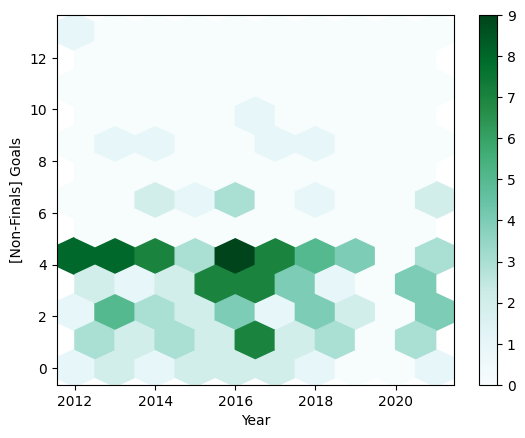

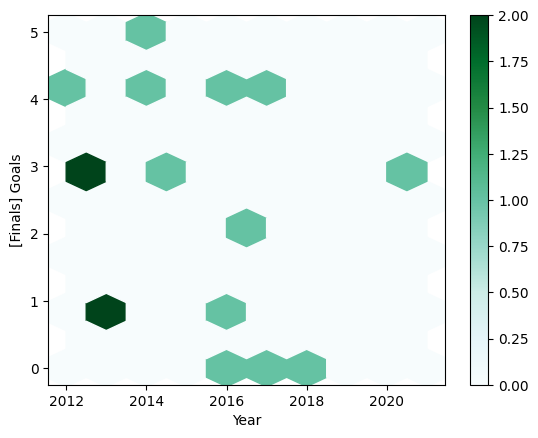

In [ ]:
print('Average goals achieved in NON-FINALS:', Franklin_Lance.query("Finals == 'No'" )['Goals'].mean())
print('Average goals achieved in FINALS:',     Franklin_Lance.query("Finals == 'Yes'")['Goals'].mean())

Franklin_Lance.query("Finals == 'No'").plot( kind = "hexbin", x = "Year", y = "Goals", gridsize = (9, 6), ylabel = '[Non-Finals] Goals')
Franklin_Lance.query("Finals == 'Yes'").plot(kind = "hexbin", x = "Year", y = "Goals", gridsize = (9, 6), ylabel = '[Finals] Goals')

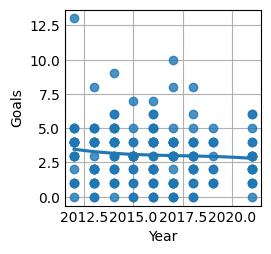

In [ ]:
# create scatterplot with regression line
sns.regplot(Franklin_Lance, x='Year', y='Goals', order=3, ci=None)
plt.show()

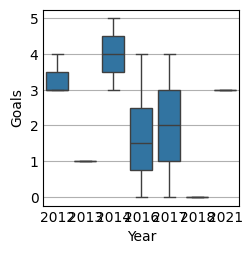

<Figure size 1000x600 with 0 Axes>

In [ ]:
# plot
tmp = Franklin_Lance.query("Finals == 'Yes'")
sns.boxplot(data=tmp, x="Year", y="Goals", hue="Finals")
plt.figure(figsize=(10, 6))
plt.show()

In [ ]:
# sns.distplot(Franklin_Lance['Year'])
# sns.distplot(Franklin_Lance['Goals']);
# sns.kdeplot(Franklin_Lance[["Goals"]]);
# sns.pairplot(Franklin_Lance, hue='Finals', height=2.5);

```python
literacy = pandas.read_csv("data/female_literacy.csv") # reading in data
literacy = literacy.dropna() # Fixing data
d = numpy.polyfit(literacy["year"], literacy["literacy"], 1) # generating coefficients
f = numpy.poly1d(d) # Create the "formula" function using the coefficients
literacy["prediction"] = f(literacy["year"]) # Applying our formula to generate predictions for all years
canvas = literacy.plot(kind="scatter", x="year", y="literacy") # plotting the original year vs literacy rate
literacy.plot(kind="line", x="year", y="prediction", ax=canvas, color="red") # plotting the year vs predicted literacy
```

In [ ]:
# !curl -O 
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')

In [ ]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})

In [ ]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

In [ ]:

sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [ ]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

In [ ]:
planets = sns.load_dataset('planets')
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

In [ ]:
tips = sns.load_dataset('tips')

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

In [ ]:
# create 'Player' subsets of df data
Franklin_Lance  = df[df["player"].apply(lambda x: x == 'Franklin, Lance')]
Papley_Tom      = df[df["player"].apply(lambda x: x == 'Papley, Tom')]
Mumford_Shane   = df[df["player"].apply(lambda x: x == 'Mumford, Shane')]
Hooker_Cale     = df[df["player"].apply(lambda x: x == 'Hooker, Cale')]

In [ ]:
# example of additive scatter plotting!
# where "existing_plot" is the first plot and the following two lines of code are the two additional classes!

just_setosa = iris["class"] == "Iris-setosa"
just_versicolor = iris["class"] == "Iris-versicolor"
just_virginica = iris["class"] == "Iris-virginica"

existing_plot = iris[just_setosa].plot(kind="scatter", color="Red", x="sepal length", y="sepal width", label="setosa")
iris[just_versicolor].plot(kind="scatter", color="Blue", x="sepal length", y="sepal width", ax=existing_plot, label="versicolor")
iris[just_virginica].plot(kind="scatter", color="Green", x="sepal length", y="sepal width", ax=existing_plot, label="virginica")